In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name = 'seasia_serotype'
infile = '../southeast_asia/serotype/model_performance_fine2.csv'
model_performance = pd.read_csv(infile, index_col=0)

model_performance.drop('Unnamed: 0.1', axis=1, inplace=True)
model_performance = model_performance.reset_index()

fit_params = ['DENV1_f0','DENV2_f0','DENV3_f0','beta', 'gamma', 'sigma']
metrics = ['abs_error', 'accuracy', 'beta', 'delta_sse', 'information_gain', 'pearson_r2', 'spearman_r']

In [5]:
pd.unique(model_performance['gamma'])

array([ 0.8 ,  0.2 ,  0.35,  0.05,  0.5 ,  0.65,  0.95])

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Best fit (optimizing delta_sse):
index         170.000000
DENV1_f0        0.450000
DENV2_f0        0.450000
DENV3_f0        0.300000
abs_error       0.107693
accuracy        0.660142
beta            0.200000
delta_sse       3.672483
gamma           0.200000
pearson_r2      0.483301
sigma           0.783333
spearman_r      0.484847
Name: 68084, dtype: float64


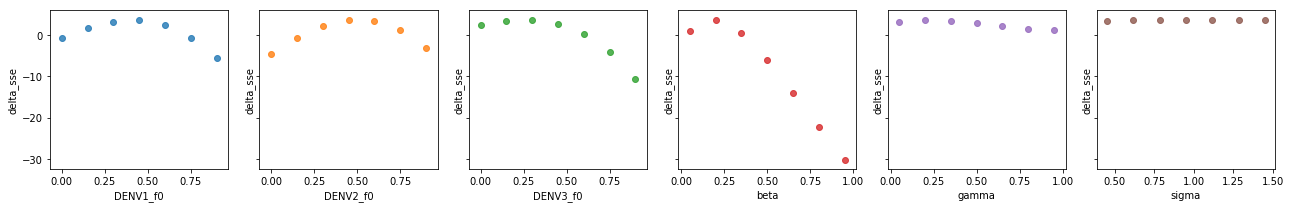

Best fit (optimizing pearson_r2):
index         289.000000
DENV1_f0        0.750000
DENV2_f0        0.900000
DENV3_f0        0.300000
abs_error       0.112883
accuracy        0.665480
beta            0.800000
delta_sse      -2.629301
gamma           0.500000
pearson_r2      0.580134
sigma           1.116667
spearman_r      0.483927
Name: 50024, dtype: float64


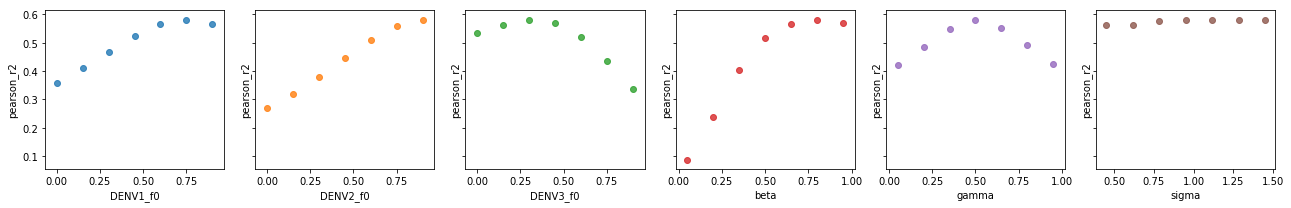

In [4]:
def plot_profile_likelihoods(model_performance, metric):

    if metric == 'abs_error':
        best_fit = model_performance.ix[model_performance[metric].idxmin()]
    else:
        best_fit = model_performance.ix[model_performance[metric].idxmax()]
    print 'Best fit (optimizing %s):\n'%metric, best_fit
    
    fig, axes = plt.subplots(ncols=len(fit_params), nrows=1, figsize=(3*len(fit_params), 3), sharey=True)
    for profile_param,ax in zip(fit_params, axes):
        
        fixed_params = [p for p in fit_params if p != profile_param]
        
        plot_data = model_performance
        for fp in fixed_params:
            plot_data = plot_data.loc[plot_data[fp] == best_fit[fp]]
        
        sns.regplot(profile_param, metric, data=plot_data, fit_reg=False, ax=ax)
        ax.set_xlabel(profile_param)
        ax.set_ylabel(metric)
        
    plt.tight_layout()
#     plt.savefig('../profile-likelihoods/%s_%s_perf.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return best_fit

    
delta_sse = plot_profile_likelihoods(model_performance, 'delta_sse')
r2 = plot_profile_likelihoods(model_performance, 'pearson_r2')

In [7]:
def generate_table(best_fit, metric, genres, antres):
    fit_dict = best_fit.to_dict()
    fit_dict['DENV4_f0'] = 0.0
    
    if metric == 'delta_sse':
        metric_str = '$\Delta$ SSE'
    elif metric == 'pearson_r2':
        metric_str = 'Pearson $R^2$'
    else:
        metric_str = metric.capitalize()
    metadata = ' & '.join([genres.capitalize(), antres.capitalize(), metric_str, '%.2f'%fit_dict[metric]])
    params = ' & '.join(['%.2f'%fit_dict[param] for param in ['beta', 'gamma', 'sigma', 'DENV1_f0', 'DENV2_f0', 'DENV3_f0', 'DENV4_f0']])
    print(metadata+' & '+params + r' \\ ')
    
generate_table(delta_sse, 'delta_sse', 'Serotype', 'Interserotype')
generate_table(r2, 'pearson_r2', 'Serotype', 'Interserotype')



Serotype & Interserotype & $\Delta$ SSE & 3.67 & 0.20 & 0.20 & 0.78 & 0.45 & 0.45 & 0.30 & 0.00 \\ 
Serotype & Interserotype & Pearson $R^2$ & 0.58 & 0.80 & 0.50 & 1.12 & 0.75 & 0.90 & 0.30 & 0.00 \\ 
